In [238]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon,LineString,Point
import fiona
import json

# 진행상황
from IPython.display import display
from tqdm import tqdm

# 경고제어
import warnings
warnings.filterwarnings('ignore')

# 폰트
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'

# 파일 저장.
import pickle

# 색깔.
import random

In [239]:
# df=gpd.read_file('SBJ_2012_002/13.용인시_행정경계(읍면동).geojson')
df=gpd.read_file('SBJ_2012_002/11.용인시_법정경계(시군구).geojson')
# df.head()

In [240]:
store=pd.read_csv('SBJ_2012_002/1.용인시_상권_정보.csv')
store=store.dropna()
display(store.isna().sum())
store.head()

대분류코드       0
중분류코드       0
소분류코드       0
표준산업분류코드    0
표준산업분류명     0
행정동코드       0
행정동명        0
도로명주소       0
경도          0
위도          0
dtype: int64

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도
0,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로139번길 6-5,127.096851,37.324611
1,Q,Q01,Q01A08,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.102347,37.324553
2,Q,Q01,Q01A01,I56111,한식 음식점업,4146352000,구갈동,경기도 용인시 기흥구 갈곡로7번길 8,127.128573,37.272405
3,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146151000,중앙동,경기도 용인시 처인구 금령로71번길 2,127.204204,37.235371
4,Q,Q10,Q10A01,I56111,한식 음식점업,4146359000,보정동,경기도 용인시 기흥구 죽전로 50,127.114245,37.320282


In [241]:
# data={}

# for idx in tqdm(store.표준산업분류명.unique()):
#     df=store[store.표준산업분류명==idx]
#     df['geometry']=store.apply(lambda row:Point([row['경도'],row['위도']]),axis=1)
#     df=gpd.GeoDataFrame(df[['geometry']],geometry='geometry')
#     data[idx]=df   

In [242]:
# with open('categorical_store.pickle','wb') as f:
#     pickle.dump(data,f)

In [243]:
with open('categorical_store.pickle','rb') as f:
    cat_store=pickle.load(f)

for key in tqdm(cat_store.keys()):
    cat_store[key].crs={'init':'epsg:4326'}

100%|██████████| 183/183 [00:02<00:00, 79.19it/s]


분류명 따라 나누고 비춰보기   
색깔 다시 봐보기

In [244]:
loads=gpd.read_file('SBJ_2012_002/9.용인시_도로명주소_도로.geojson')
# loads.head()

In [311]:
ltp={'geometry':[]}
for load in tqdm(loads['geometry']):
    for xy in load[0].coords:
        y,x=xy
        ltp['geometry'].append(Point(y,x))
ltp=gpd.GeoDataFrame(ltp,geometry='geometry')
display(ltp.head())

100%|██████████| 5891/5891 [00:04<00:00, 1180.22it/s]


,geometry
0,POINT (127.12341 37.09031)
1,POINT (127.12340 37.09032)
2,POINT (127.12254 37.09227)
3,POINT (127.11936 37.09925)
4,POINT (127.11819 37.10182)


In [312]:
ltp_buf=gpd.GeoDataFrame({'geometry':ltp.buffer(1/60)})

In [247]:
sigungu=gpd.read_file('SBJ_2012_002/12.용인시_법정경계(읍면동).geojson')
sigungu.head()

,EMD_CD,EMD_KOR_NM,geometry
0,41461101,김량장동,"MULTIPOLYGON (((127.19037 37.23145, 127.19042 ..."
1,41461102,역북동,"MULTIPOLYGON (((127.16958 37.22514, 127.16962 ..."
2,41461103,삼가동,"MULTIPOLYGON (((127.14917 37.24079, 127.14957 ..."
3,41461104,남동,"MULTIPOLYGON (((127.17458 37.22458, 127.17487 ..."
4,41461105,유방동,"MULTIPOLYGON (((127.17158 37.26933, 127.17216 ..."


### 도로 커버 가능

In [313]:
%%time
sss=gpd.overlay(df,ltp_buf,how='difference')
sss.dissolve(by='SIG_KOR_NM').area*100

SIG_KOR_NM
용인시처인구    0.010602
dtype: float64

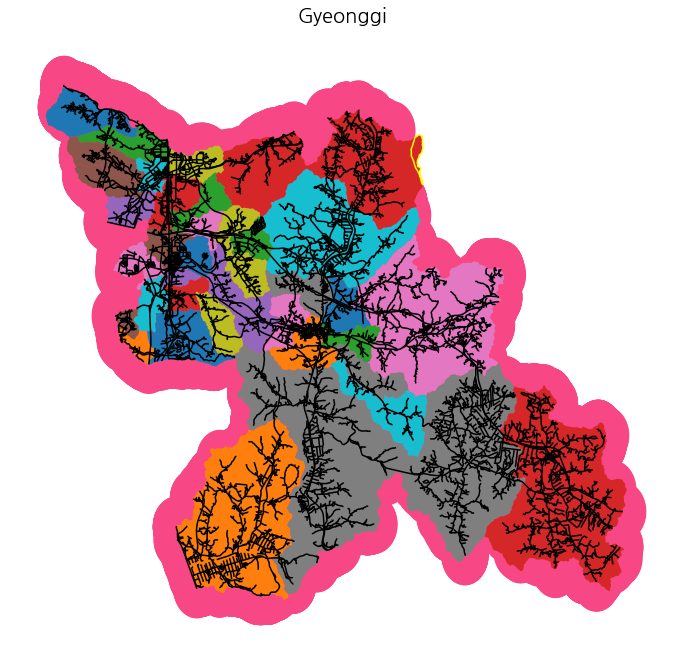

In [314]:
%%time
ax=df.plot(figsize=(12,12), alpha=0.8,column='SIG_KOR_NM',color=['#beface','#54574f','#bfa978']) # 겹쳐서 안보인다.
ltp_buf.plot(ax=ax,color='#f74885') # 핑크 
loads.plot(ax=ax,color='black')
sigungu.plot(ax=ax,column='EMD_KOR_NM') # 지역별 색깔 다름.
gpd.overlay(df,ltp_buf,how='difference').dissolve(by='SIG_KOR_NM').boundary.plot(ax=ax, color='yellow') # 노란색 선으로 그은 부분.

ax.set_title("Gyeonggi", fontsize=20)
ax.set_axis_off()

plt.show()

### store 분포

In [315]:
# http://www.yongin.go.kr/estat/index.do 용인시 
# http://www.yongin.go.kr/user/bbs/BD_selectBbs.do?q_menu=&q_clCode=1&q_lwprtClCode=&q_searchKeyTy=sj___1002&q_searchVal=&q_category=&q_bbsCode=1030&q_bbscttSn=20201124113535298&q_currPage=1&q_sortName=&q_sortOrder=&
# 용인시 인구분포
df['사업체수']=[19777,19666,13280]
df['종사자수']=[116045,148751,72720]
df['인구수']=[258335,440826,376309]
df['밀집도(#/area)']=df['사업체수']/df['geometry'].area
df

,SIG_CD,SIG_KOR_NM,geometry,사업체수,종사자수,인구수,밀집도(#/area),승하차수
0,41461,용인시처인구,"MULTIPOLYGON (((127.10873 37.12385, 127.10874 ...",19777,116045,258335,4.164647e+05,366580
1,41463,용인시기흥구,"MULTIPOLYGON (((127.06526 37.26919, 127.06525 ...",19666,148751,440826,2.367169e+06,556014
2,41465,용인시수지구,"MULTIPOLYGON (((127.02966 37.37213, 127.02975 ...",13280,72720,376309,3.101257e+06,826854


In [316]:
# https://gits.gg.go.kr/gtdb/web/trafficDb/bus/TransitBusPass.do
# https://www.zamzar.com/uploadComplete.php?convertFile=xls&to=csv&session=03c9f38615564d1e3293c6db2c3748&email=false&tcs=Z75 

# 1번에서 얻고, 2번에서 바꾸고.

bus_12=pd.read_csv('TransitBusPass.csv',header=1,thousands=',')
bus=bus_12.loc[(bus_12['시간']=='주간')|(bus_12['시간']=='전일')].reset_index(drop=True)

bus['gu']=bus.지역.str.extract('([가-힣]+구)')

bus=bus.groupby('gu',as_index=False)['전체.2'].agg({'승하차':'sum'})
bus

,gu,승하차
0,기흥구,556014
1,수지구,826854
2,처인구,366580


In [317]:
df['승하차수']=[366580,556014,826854]
df

,SIG_CD,SIG_KOR_NM,geometry,사업체수,종사자수,인구수,밀집도(#/area),승하차수
0,41461,용인시처인구,"MULTIPOLYGON (((127.10873 37.12385, 127.10874 ...",19777,116045,258335,4.164647e+05,366580
1,41463,용인시기흥구,"MULTIPOLYGON (((127.06526 37.26919, 127.06525 ...",19666,148751,440826,2.367169e+06,556014
2,41465,용인시수지구,"MULTIPOLYGON (((127.02966 37.37213, 127.02975 ...",13280,72720,376309,3.101257e+06,826854


In [318]:
chart=df[['사업체수','종사자수','인구수','밀집도(#/area)','승하차수']]

chart.index=['처인구','기흥구','수지구']
chart

,사업체수,종사자수,인구수,밀집도(#/area),승하차수
처인구,19777,116045,258335,4.164647e+05,366580
기흥구,19666,148751,440826,2.367169e+06,556014
수지구,13280,72720,376309,3.101257e+06,826854


In [319]:
store['gu']=store['도로명주소'].str.extract('([가-힣]+구)')
gu_store=store.groupby(['gu'])['표준산업분류명'].value_counts().unstack(fill_value=0).T

In [320]:
gu_store['기흥구']=gu_store['기흥구']/gu_store['기흥구'].sum()*100
gu_store['처인구']=gu_store['처인구']/gu_store['처인구'].sum()*100
gu_store['수지구']=gu_store['수지구']/gu_store['수지구'].sum()*100

In [321]:
top10_gu_store=gu_store.sort_values(['기흥구','수지구','처인구'],ascending=False)[:10]

In [322]:
top10_gu_store.index

Index(['한식 음식점업', '일반 교과 학원', '비알콜 음료점업', '부동산 자문 및 중개업', '셔츠 및 기타 의복 소매업',
       '두발미용업', '분식 및 김밥 전문점', '외국어학원', '예술 학원', '기타 주점업'],
      dtype='object', name='표준산업분류명')

In [323]:
top10_gu_store_cumsum=np.cumsum(top10_gu_store)

In [324]:
def cumsum_bar(height,bottom,ax,label):
    ax.bar(x=['기흥구','수지구','처인구'],height=height,bottom=bottom,label=label)

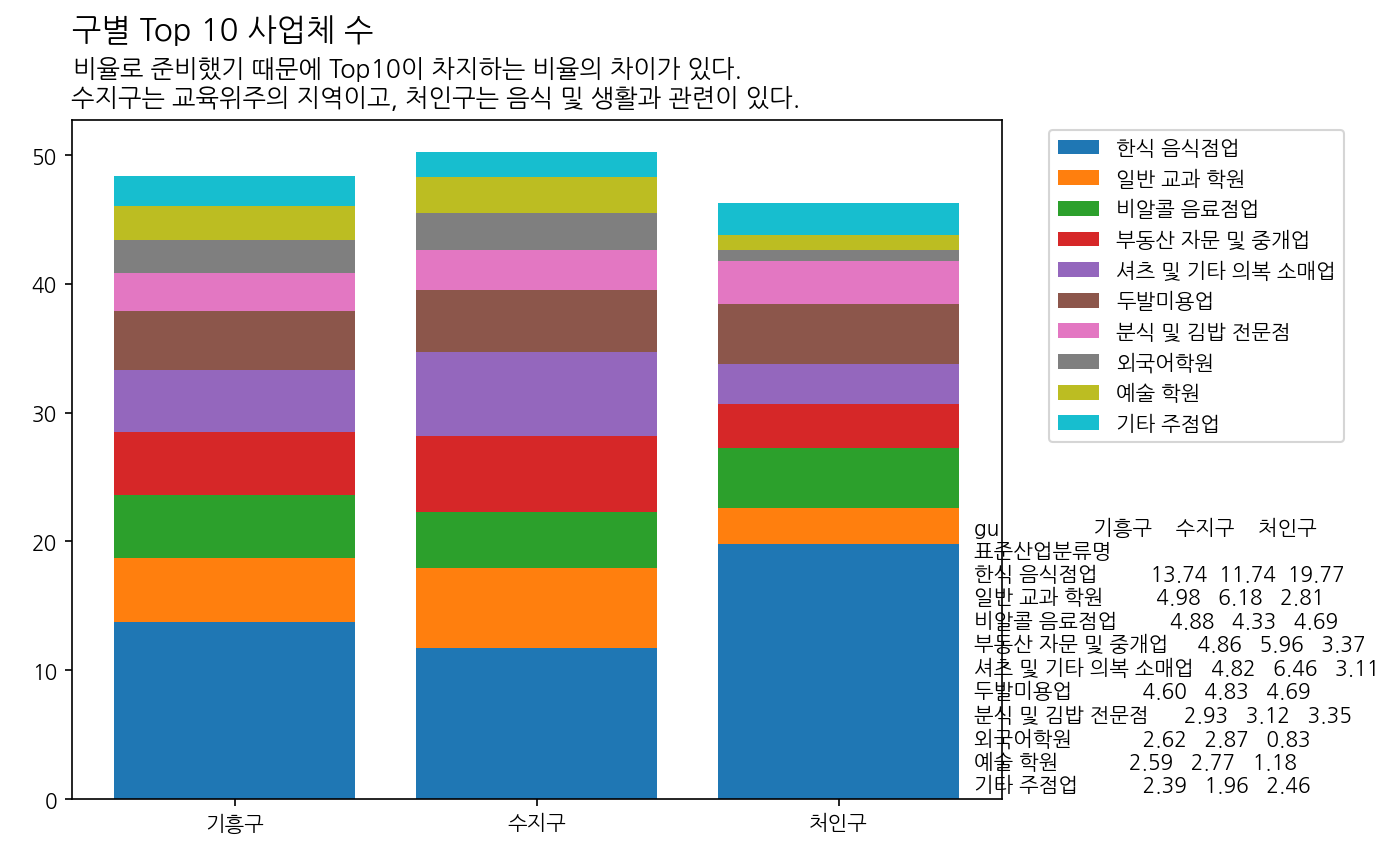

In [325]:
fig,ax=plt.subplots(1,1,figsize=(8,6),dpi=150)

cumsum_bar(height=top10_gu_store.loc['한식 음식점업'].values,
           bottom=0,
           ax=ax,label='한식 음식점업')
cumsum_bar(height=top10_gu_store.loc['일반 교과 학원'].values,
           bottom=top10_gu_store_cumsum.loc['한식 음식점업'].values,
           ax=ax,label='일반 교과 학원')
cumsum_bar(height=top10_gu_store.loc['비알콜 음료점업'].values,
           bottom=top10_gu_store_cumsum.loc['일반 교과 학원'].values,
           ax=ax,label='비알콜 음료점업')
cumsum_bar(height=top10_gu_store.loc['부동산 자문 및 중개업'].values,
           bottom=top10_gu_store_cumsum.loc['비알콜 음료점업'].values,
           ax=ax,label='부동산 자문 및 중개업')
cumsum_bar(height=top10_gu_store.loc['셔츠 및 기타 의복 소매업'].values,
           bottom=top10_gu_store_cumsum.loc['부동산 자문 및 중개업'].values,
           ax=ax,label='셔츠 및 기타 의복 소매업')
cumsum_bar(height=top10_gu_store.loc['두발미용업'].values,
           bottom=top10_gu_store_cumsum.loc['셔츠 및 기타 의복 소매업'].values,
           ax=ax,label='두발미용업')
cumsum_bar(height=top10_gu_store.loc['분식 및 김밥 전문점'].values,
           bottom=top10_gu_store_cumsum.loc['두발미용업'].values,
           ax=ax,label='분식 및 김밥 전문점')
cumsum_bar(height=top10_gu_store.loc['외국어학원'].values,
           bottom=top10_gu_store_cumsum.loc['분식 및 김밥 전문점'].values,
           ax=ax,label='외국어학원')
cumsum_bar(height=top10_gu_store.loc['예술 학원'].values,
           bottom=top10_gu_store_cumsum.loc['외국어학원'].values,
           ax=ax,label='예술 학원')
cumsum_bar(height=top10_gu_store.loc['기타 주점업'].values,
           bottom=top10_gu_store_cumsum.loc['예술 학원'].values,
           ax=ax,label='기타 주점업')

ax.annotate(f"{top10_gu_store.round(2)}",xy=(2.45,0.6))
ax.legend(bbox_to_anchor=(1.04,1))
ax.set_title("구별 Top 10 사업체 수",fontsize=15,loc='left',y=1.1)

plt.suptitle("비율로 준비했기 때문에 Top10이 차지하는 비율의 차이가 있다.\n        수지구는 교육위주의 지역이고, 처인구는 음식 및 생활과 관련이 있다.",
             x=0.405,y=0.95)
plt.show()

In [326]:
# 기흥구와 처인구에 비해 수지구는 포화상태다.
display(chart.style.background_gradient(cmap='Blues'))

,사업체수,종사자수,인구수,밀집도(#/area),승하차수
처인구,19777,116045,258335,416464.670551,366580
기흥구,19666,148751,440826,2367168.621877,556014
수지구,13280,72720,376309,3101256.777939,826854


### 표준산업분류명 넣기.

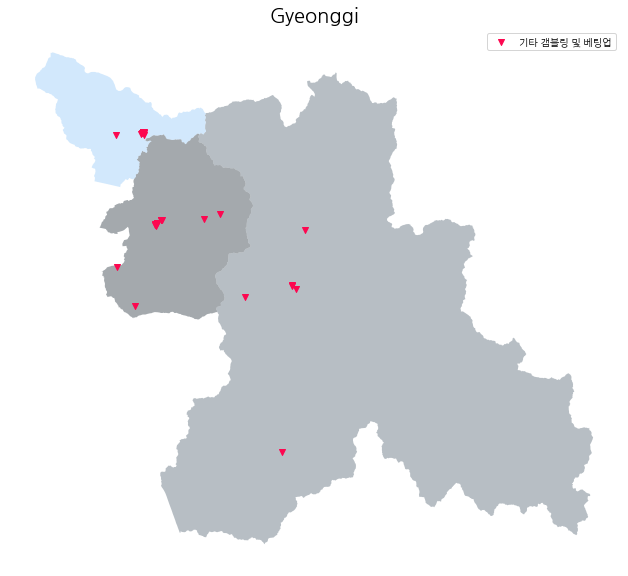

In [327]:
ax=df.plot(figsize=(11,11),column='SIG_KOR_NM',color=['#88949e','#687178','#b4d9fa'],alpha=0.6)

# label에 원하는 표준산업분류명 넣기.
cat_store['기타 갬블링 및 베팅업'].plot(ax=ax, marker='v', color='#fd0750', label='기타 갬블링 및 베팅업')

ax.set_title("Gyeonggi", fontsize=20)
ax.set_axis_off()

ax.legend()
plt.show()